<a href="https://colab.research.google.com/github/yotam-biu/tutorial9/blob/main/machine_learning_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/yotam-biu/tutorial9/main/penguins.csv -O /content/penguins.csv
!wget https://raw.githubusercontent.com/yotam-biu/python_utils/main/lab_setup_do_not_edit.py -O /content/lab_setup_do_not_edit.py
import lab_setup_do_not_edit

--2025-01-05 08:11:51--  https://raw.githubusercontent.com/yotam-biu/tutorial9/main/penguins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12038 (12K) [text/plain]
Saving to: ‘/content/penguins.csv’

/content/penguins.c 100%[===================>]  11.76K  --.-KB/s    in 0s      

2025-01-05 08:11:52 (67.3 MB/s) - ‘/content/penguins.csv’ saved [12038/12038]





## 1. **Load the dataset:**  

   After running the first cell of this notebook, the file `penguins.csv` will appear in the `Files` folder.
   You need to loaded the file as a DataFrame.  




In [ ]:
import pandas as pd

df = pd.read_csv('penguins.csv')
df = df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Chinstrap,Dream,49.8,17.3,198.0,3675.0,Female
1,Adelie,Biscoe,42.0,19.5,200.0,4050.0,Male
2,Adelie,Torgersen,33.5,19.0,190.0,3600.0,Female
3,Gentoo,Biscoe,45.7,13.9,214.0,4400.0,Female
4,Adelie,Torgersen,41.8,19.4,198.0,4450.0,Male


## 2. **Select features:**  

   - Choose **two features** as inputs for the model.  
   - Choose the feature `sex` as the output (target) of the model.  

  #### Advice:  
  - You can consider creating pair plots or using other EDA methods we learned in the last lecture to explore the relationships between features and determine which ones are most relevant.  


In [ ]:
print(df.columns.to_list())

['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']


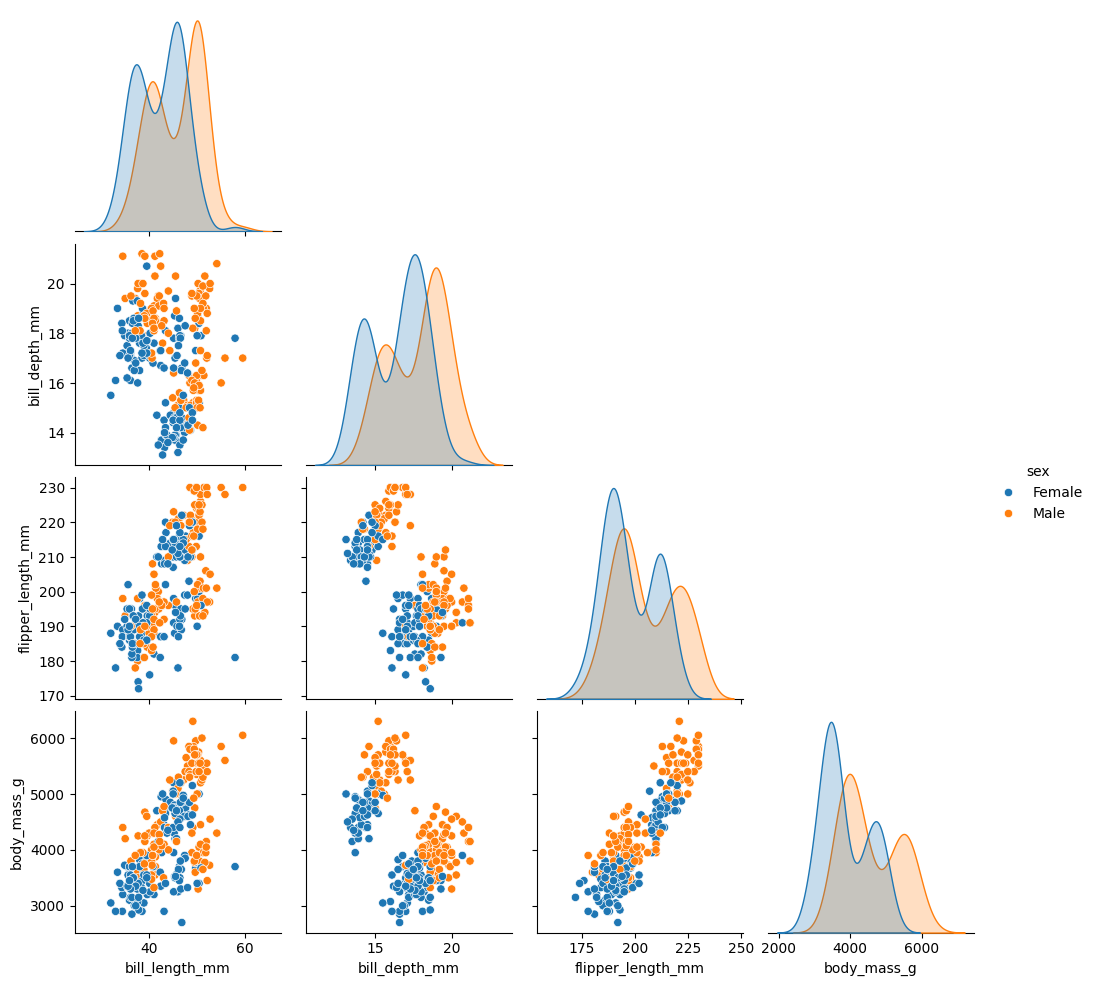

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="sex", diag_kind="kde", corner=True)
plt.show()


In [ ]:
selected_features = ['bill_depth_mm',  'body_mass_g']#['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[selected_features]
y = df['sex']

## 3. **Scale the data:**

   Apply the `MinMaxScaler` to scale the two input columns to a range between 0 and 1.  


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## 4. **Split the data:**

   Divide the dataset into a training set and a validation set.





In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. **Choose a model:**  

   Select a model to train on the data.  



In [ ]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression()
# model.fit(X_train, y_train)

In [ ]:
# from sklearn.svm import SVC

# model = SVC()
# model.fit(X_train, y_train)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier()
# model.fit(X_train, y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

# 6. **Test the accuracy:**  

   Evaluate the model's accuracy on the test set. Ensure that the accuracy is at least **0.85**.  


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8679245283018868


## 7. **Save and upload the model:**  

   After you are happy with your results, save the model with the `.joblib` extension and upload it to your GitHub repository main folder.
   
   Additionally, update the `config.yaml` file with the list of selected features and the model's joblib file name.  


example:  
```yaml
selected_features: ["A", "B"]  
path: "my_model.joblib"  
```

In [ ]:
import joblib

joblib.dump(model, 'my_model.joblib')

['my_model.joblib']

In [ ]:
# model = joblib.load('my_model.joblib')

## 8. **Advanced Assignment**  
   After completing the previous assignment and receiving a green "✔" in the  GitHub repository, you may want to improve your model by:  
   - Adding more than two features.  
   - Trying a different model.  
   - Adjusting the model's parameters.  
   - Using categorical features as input (apply `OneHotEncoder` for encoding).  
   - Using a numerical value as the output instead of a categorical one.  


In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns=['island'])
one_hot_encoded_data.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,Chinstrap,49.8,17.3,198.0,3675.0,Female,False,True,False
1,Adelie,42.0,19.5,200.0,4050.0,Male,True,False,False
2,Adelie,33.5,19.0,190.0,3600.0,Female,False,False,True
3,Gentoo,45.7,13.9,214.0,4400.0,Female,True,False,False
4,Adelie,41.8,19.4,198.0,4450.0,Male,False,False,True


In [ ]:
data

,body_mass_g,species,sex,species_encoded,sex_encoded
0,3750.0,Adelie,MALE,0,1
1,3800.0,Adelie,FEMALE,0,0
2,3250.0,Adelie,FEMALE,0,0
4,3450.0,Adelie,FEMALE,0,0
5,3650.0,Adelie,MALE,0,1
...,...,...,...,...,...
338,4925.0,Gentoo,FEMALE,2,0
340,4850.0,Gentoo,FEMALE,2,0
341,5750.0,Gentoo,MALE,2,1
342,5200.0,Gentoo,FEMALE,2,0
